# Load Data

In [22]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [1]:
import pandas as pd
from pathlib import Path
import pyarrow.parquet as pq

month = 1
year = 2022
path = Path("..") / "data" / "raw" / f"rides_{year}_{month:02}.parquet"

table = pq.read_table(path)
rides = table.to_pandas()
rides.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.0,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.0,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.5,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0


In [2]:
rides_cp = rides.copy()
rides_cp["duration"] = rides["tpep_dropoff_datetime"] - rides["tpep_pickup_datetime"]
rides_cp.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0,0 days 00:17:49
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.0,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0,0 days 00:08:24
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0,0 days 00:08:58
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.0,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0,0 days 00:10:02
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.5,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0,0 days 00:37:32


In [3]:
rides_cp["duration"].describe().T

count                   2463931
mean     0 days 00:14:12.732175
std      0 days 00:46:26.718308
min           -3 days +14:37:36
25%             0 days 00:06:19
50%             0 days 00:10:11
75%             0 days 00:16:10
max             5 days 21:53:11
Name: duration, dtype: object

In [4]:
rides_cp["duration"].quantile(0)
rides_cp["duration"].quantile(0.01)
rides_cp["duration"].quantile(0.995)
rides_cp["duration"].quantile(0.999)

Timedelta('0 days 13:56:27.640000')

In [5]:
duration_filter = (rides_cp["duration"] > pd.Timedelta(0)) & (rides_cp["duration"] <= pd.Timedelta(hours=5))
sum(~duration_filter)

5151

In [6]:
rides_cp["total_amount"].describe().T

count    2.463931e+06
mean     1.916937e+01
std      2.559641e+02
min     -4.803000e+02
25%      1.130000e+01
50%      1.469000e+01
75%      2.002000e+01
max      4.010956e+05
Name: total_amount, dtype: float64

In [7]:
rides_cp["total_amount"].quantile(0.0)
rides_cp["total_amount"].quantile(0.01)
rides_cp["total_amount"].quantile(0.995)
rides_cp["total_amount"].quantile(0.999)

122.9

In [8]:
rides_cp["total_amount"].max()

401095.62

In [9]:
total_amount_filter = (rides_cp["total_amount"]  > 0) & (rides_cp["total_amount"] <= rides_cp["total_amount"].quantile(0.999))
sum(~total_amount_filter) / rides_cp.shape[0] * 100

0.6441332975639334

<Axes: title={'center': 'Box Plot of Categories'}>

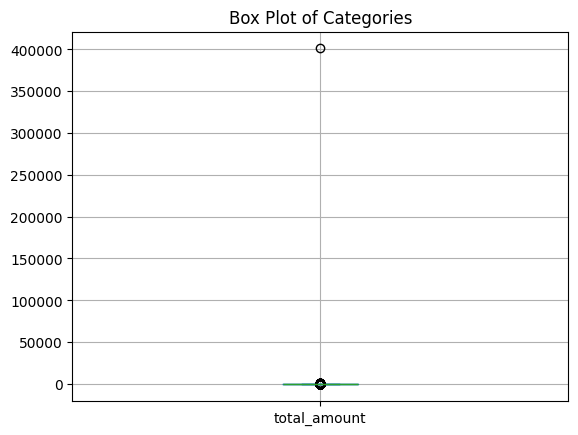

In [10]:
rides_cp["total_amount"].plot.box(title="Box Plot of Categories", grid=True)

In [11]:
nyc_locations = ~rides_cp["PULocationID"].isin((1, 264, 265))
sum(~nyc_locations)                                        

30135

In [12]:
sorted_df = rides_cp.sort_values(by="tpep_pickup_datetime", ascending=True)  

# Get the top 10 (smallest) and bottom 10 (largest) values  
top_10 = sorted_df.head(10)  
bottom_10 = sorted_df.tail(10)  

top_10

bottom_10

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
720031,2,2022-02-01 03:00:05,2022-02-01 03:15:08,3.0,2.62,1.0,N,239,162,2,12.0,0.0,0.5,0.00,0.0,0.3,15.30,2.5,0.0,0 days 00:15:03
724394,2,2022-02-01 03:30:04,2022-02-01 03:34:05,3.0,0.85,1.0,N,262,236,2,5.0,0.0,0.5,0.00,0.0,0.3,8.30,2.5,0.0,0 days 00:04:01
728883,2,2022-02-22 11:31:12,2022-02-22 11:42:30,3.0,1.50,1.0,N,163,141,1,9.0,0.0,0.5,2.46,0.0,0.3,14.76,2.5,0.0,0 days 00:11:18
261913,2,2022-03-09 04:48:40,2022-03-09 04:58:27,4.0,2.88,1.0,N,164,140,1,11.0,0.5,0.5,2.96,0.0,0.3,17.76,2.5,0.0,0 days 00:09:47
728884,2,2022-03-15 20:10:18,2022-03-15 20:20:25,2.0,1.70,1.0,N,161,143,2,9.0,0.0,0.5,0.00,0.0,0.3,12.30,2.5,0.0,0 days 00:10:07
733464,2,2022-03-15 20:34:06,2022-03-15 20:41:58,3.0,1.12,1.0,N,142,163,1,7.0,0.0,0.5,2.06,0.0,0.3,12.36,2.5,0.0,0 days 00:07:52
733465,2,2022-03-15 20:47:56,2022-03-16 04:00:49,2.0,1.88,1.0,N,162,236,1,10.0,0.0,0.5,2.66,0.0,0.3,15.96,2.5,0.0,0 days 07:12:53
733466,2,2022-04-06 04:09:25,2022-04-06 04:18:39,2.0,1.67,1.0,N,161,234,1,8.5,0.0,0.5,1.00,0.0,0.3,12.80,2.5,0.0,0 days 00:09:14
752186,2,2022-05-18 20:17:19,2022-05-18 20:22:58,4.0,1.47,1.0,N,48,142,1,6.5,1.0,0.5,2.16,0.0,0.3,12.96,2.5,0.0,0 days 00:05:39
752187,2,2022-05-18 20:41:57,2022-05-18 20:47:45,4.0,1.35,1.0,N,50,142,1,6.5,1.0,0.5,1.00,0.0,0.3,11.80,2.5,0.0,0 days 00:05:48


In [13]:
filter_date_range = (rides_cp["tpep_pickup_datetime"] >= "2022-01-01") & (rides_cp["tpep_pickup_datetime"] < "2022-02-01")
sum(~filter_date_range)

52

In [14]:
final_filter = duration_filter & total_amount_filter & nyc_locations & filter_date_range
numbers_dropped = final_filter.shape[0] - sum(final_filter) # numbers dropped
numbers_dropped
numbers_dropped/final_filter.shape[0] * 100

1.9801690875272073

# Rename

In [15]:
rides

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.50,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.00,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.50,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.00,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.50,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2463926,2,2022-01-31 23:36:53,2022-01-31 23:42:51,NaN,1.32,NaN,None,90,170,0,8.00,0.0,0.5,2.39,0.0,0.3,13.69,NaN,NaN
2463927,2,2022-01-31 23:44:22,2022-01-31 23:55:01,NaN,4.19,NaN,None,107,75,0,16.80,0.0,0.5,4.35,0.0,0.3,24.45,NaN,NaN
2463928,2,2022-01-31 23:39:00,2022-01-31 23:50:00,NaN,2.10,NaN,None,113,246,0,11.22,0.0,0.5,2.00,0.0,0.3,16.52,NaN,NaN
2463929,2,2022-01-31 23:36:42,2022-01-31 23:48:45,NaN,2.92,NaN,None,148,164,0,12.40,0.0,0.5,0.00,0.0,0.3,15.70,NaN,NaN


In [16]:
rides = rides[final_filter]
rides = rides[["tpep_pickup_datetime", "PULocationID"]]

In [17]:
rides.rename(columns={
    "tpep_pickup_datetime": "pickup_datetime",
    "PULocationID": "pickup_location_id"
}, inplace=True)
rides.head()
year = 2023
month = 1
path = Path("..") / "data" / "processed" / f"rides_{year}_{month:02}.parquet"
rides.to_parquet(path, engine="pyarrow", index=False)

In [18]:
rides[rides["pickup_location_id"] == 48]

,pickup_datetime,pickup_location_id
50,2022-01-01 00:19:52,48
51,2022-01-01 00:30:20,48
133,2022-01-01 00:19:37,48
163,2022-01-01 00:26:49,48
215,2022-01-01 00:33:50,48
...,...,...
2463840,2022-01-31 22:59:00,48
2463849,2022-01-31 22:58:00,48
2463887,2022-01-31 23:19:43,48
2463894,2022-01-31 23:46:27,48


In [19]:
import pandas as pd


In [20]:
def get_location_dict():
    taxi_z = pd.read_csv("/Users/vedclove/Documents/Kaam-Dhanda/UniBuff/CDA500/NYC-Yellow-Taxi/taxi_zones.csv")
    taxi_z = taxi_z.drop(columns=["service_zone", "Borough"])
    location = {}
    for loc, zon in zip(taxi_z["LocationID"], taxi_z["Zone"]):
        location[loc] = zon        
    return location

In [21]:
location = {1: 'Newark Airport', 2: 'Jamaica Bay', 3: 'Allerton/Pelham Gardens', 4: 'Alphabet City', 5: 'Arden Heights', 6: 'Arrochar/Fort Wadsworth', 7: 'Astoria', 8: 'Astoria Park', 9: 'Auburndale', 10: 'Baisley Park', 11: 'Bath Beach', 12: 'Battery Park', 13: 'Battery Park City', 14: 'Bay Ridge', 15: 'Bay Terrace/Fort Totten', 16: 'Bayside', 17: 'Bedford', 18: 'Bedford Park', 19: 'Bellerose', 20: 'Belmont', 21: 'Bensonhurst East', 22: 'Bensonhurst West', 23: 'Bloomfield/Emerson Hill', 24: 'Bloomingdale', 25: 'Boerum Hill', 26: 'Borough Park', 27: 'Breezy Point/Fort Tilden/Riis Beach', 28: 'Briarwood/Jamaica Hills', 29: 'Brighton Beach', 30: 'Broad Channel', 31: 'Bronx Park', 32: 'Bronxdale', 33: 'Brooklyn Heights', 34: 'Brooklyn Navy Yard', 35: 'Brownsville', 36: 'Bushwick North', 37: 'Bushwick South', 38: 'Cambria Heights', 39: 'Canarsie', 40: 'Carroll Gardens', 41: 'Central Harlem', 42: 'Central Harlem North', 43: 'Central Park', 44: 'Charleston/Tottenville', 45: 'Chinatown', 46: 'City Island', 47: 'Claremont/Bathgate', 48: 'Clinton East', 49: 'Clinton Hill', 50: 'Clinton West', 51: 'Co-Op City', 52: 'Cobble Hill', 53: 'College Point', 54: 'Columbia Street', 55: 'Coney Island', 56: 'Corona', 57: 'Corona', 58: 'Country Club', 59: 'Crotona Park', 60: 'Crotona Park East', 61: 'Crown Heights North', 62: 'Crown Heights South', 63: 'Cypress Hills', 64: 'Douglaston', 65: 'Downtown Brooklyn/MetroTech', 66: 'DUMBO/Vinegar Hill', 67: 'Dyker Heights', 68: 'East Chelsea', 69: 'East Concourse/Concourse Village', 70: 'East Elmhurst', 71: 'East Flatbush/Farragut', 72: 'East Flatbush/Remsen Village', 73: 'East Flushing', 74: 'East Harlem North', 75: 'East Harlem South', 76: 'East New York', 77: 'East New York/Pennsylvania Avenue', 78: 'East Tremont', 79: 'East Village', 80: 'East Williamsburg', 81: 'Eastchester', 82: 'Elmhurst', 83: 'Elmhurst/Maspeth', 84: "Eltingville/Annadale/Prince's Bay", 85: 'Erasmus', 86: 'Far Rockaway', 87: 'Financial District North', 88: 'Financial District South', 89: 'Flatbush/Ditmas Park', 90: 'Flatiron', 91: 'Flatlands', 92: 'Flushing', 93: 'Flushing Meadows-Corona Park', 94: 'Fordham South', 95: 'Forest Hills', 96: 'Forest Park/Highland Park', 97: 'Fort Greene', 98: 'Fresh Meadows', 99: 'Freshkills Park', 100: 'Garment District', 101: 'Glen Oaks', 102: 'Glendale', 103: "Governor's Island/Ellis Island/Liberty Island", 104: "Governor's Island/Ellis Island/Liberty Island", 105: "Governor's Island/Ellis Island/Liberty Island", 106: 'Gowanus', 107: 'Gramercy', 108: 'Gravesend', 109: 'Great Kills', 110: 'Great Kills Park', 111: 'Green-Wood Cemetery', 112: 'Greenpoint', 113: 'Greenwich Village North', 114: 'Greenwich Village South', 115: 'Grymes Hill/Clifton', 116: 'Hamilton Heights', 117: 'Hammels/Arverne', 118: 'Heartland Village/Todt Hill', 119: 'Highbridge', 120: 'Highbridge Park', 121: 'Hillcrest/Pomonok', 122: 'Hollis', 123: 'Homecrest', 124: 'Howard Beach', 125: 'Hudson Sq', 126: 'Hunts Point', 127: 'Inwood', 128: 'Inwood Hill Park', 129: 'Jackson Heights', 130: 'Jamaica', 131: 'Jamaica Estates', 132: 'JFK Airport', 133: 'Kensington', 134: 'Kew Gardens', 135: 'Kew Gardens Hills', 136: 'Kingsbridge Heights', 137: 'Kips Bay', 138: 'LaGuardia Airport', 139: 'Laurelton', 140: 'Lenox Hill East', 141: 'Lenox Hill West', 142: 'Lincoln Square East', 143: 'Lincoln Square West', 144: 'Little Italy/NoLiTa', 145: 'Long Island City/Hunters Point', 146: 'Long Island City/Queens Plaza', 147: 'Longwood', 148: 'Lower East Side', 149: 'Madison', 150: 'Manhattan Beach', 151: 'Manhattan Valley', 152: 'Manhattanville', 153: 'Marble Hill', 154: 'Marine Park/Floyd Bennett Field', 155: 'Marine Park/Mill Basin', 156: 'Mariners Harbor', 157: 'Maspeth', 158: 'Meatpacking/West Village West', 159: 'Melrose South', 160: 'Middle Village', 161: 'Midtown Center', 162: 'Midtown East', 163: 'Midtown North', 164: 'Midtown South', 165: 'Midwood', 166: 'Morningside Heights', 167: 'Morrisania/Melrose', 168: 'Mott Haven/Port Morris', 169: 'Mount Hope', 170: 'Murray Hill', 171: 'Murray Hill-Queens', 172: 'New Dorp/Midland Beach', 173: 'North Corona', 174: 'Norwood', 175: 'Oakland Gardens', 176: 'Oakwood', 177: 'Ocean Hill', 178: 'Ocean Parkway South', 179: 'Old Astoria', 180: 'Ozone Park', 181: 'Park Slope', 182: 'Parkchester', 183: 'Pelham Bay', 184: 'Pelham Bay Park', 185: 'Pelham Parkway', 186: 'Penn Station/Madison Sq West', 187: 'Port Richmond', 188: 'Prospect-Lefferts Gardens', 189: 'Prospect Heights', 190: 'Prospect Park', 191: 'Queens Village', 192: 'Queensboro Hill', 193: 'Queensbridge/Ravenswood', 194: 'Randalls Island', 195: 'Red Hook', 196: 'Rego Park', 197: 'Richmond Hill', 198: 'Ridgewood', 199: 'Rikers Island', 200: 'Riverdale/North Riverdale/Fieldston', 201: 'Rockaway Park', 202: 'Roosevelt Island', 203: 'Rosedale', 204: 'Rossville/Woodrow', 205: 'Saint Albans', 206: 'Saint George/New Brighton', 207: 'Saint Michaels Cemetery/Woodside', 208: 'Schuylerville/Edgewater Park', 209: 'Seaport', 210: 'Sheepshead Bay', 211: 'SoHo', 212: 'Soundview/Bruckner', 213: 'Soundview/Castle Hill', 214: 'South Beach/Dongan Hills', 215: 'South Jamaica', 216: 'South Ozone Park', 217: 'South Williamsburg', 218: 'Springfield Gardens North', 219: 'Springfield Gardens South', 220: 'Spuyten Duyvil/Kingsbridge', 221: 'Stapleton', 222: 'Starrett City', 223: 'Steinway', 224: 'Stuy Town/Peter Cooper Village', 225: 'Stuyvesant Heights', 226: 'Sunnyside', 227: 'Sunset Park East', 228: 'Sunset Park West', 229: 'Sutton Place/Turtle Bay North', 230: 'Times Sq/Theatre District', 231: 'TriBeCa/Civic Center', 232: 'Two Bridges/Seward Park', 233: 'UN/Turtle Bay South', 234: 'Union Sq', 235: 'University Heights/Morris Heights', 236: 'Upper East Side North', 237: 'Upper East Side South', 238: 'Upper West Side North', 239: 'Upper West Side South', 240: 'Van Cortlandt Park', 241: 'Van Cortlandt Village', 242: 'Van Nest/Morris Park', 243: 'Washington Heights North', 244: 'Washington Heights South', 245: 'West Brighton', 246: 'West Chelsea/Hudson Yards', 247: 'West Concourse', 248: 'West Farms/Bronx River', 249: 'West Village', 250: 'Westchester Village/Unionport', 251: 'Westerleigh', 252: 'Whitestone', 253: 'Willets Point', 254: 'Williamsbridge/Olinville', 255: 'Williamsburg (North Side)', 256: 'Williamsburg (South Side)', 257: 'Windsor Terrace', 258: 'Woodhaven', 259: 'Woodlawn/Wakefield', 260: 'Woodside', 261: 'World Trade Center', 262: 'Yorkville East', 263: 'Yorkville West', 264: "nan", 265: 'Outside of NYC'}